### Import Libraries

In [53]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [54]:
sns.set_style('darkgrid')

### Load Dataset

In [55]:
# Load csv
df = pd.read_csv("data/loan.csv")

/tmp/ipykernel_56073/1250389818.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/loan.csv")


In [56]:
# Shape of dataframe
df.shape

(39717, 111)

In [57]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Data understanding

We observed that the dataset contain few columns which are only filled with None, so we decided to remove them.

In [58]:
# List of all columns where values are filled with only None
df.columns[df.isnull().sum()==df.shape[0]]

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [59]:
# Removing where all are filled with None
df.dropna(inplace=True, axis=1, how="all")

We also observed columns where there are only one value present, so we decided to remove those columns.

In [60]:
# List of all columns where all rows contain same value
df.columns[df.nunique()==1]

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [61]:
# Removing where nunique is 1
df = df[[i for i in df if df[i].nunique()>1]]

In [62]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


##### We analysed the remaining 48 columns, we find out that there are columns which help us in determining risk analysis for loan, and some columns are customer behaviour columns, which will be available once a person takes a loan.

- "id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state", "desc" are not required for risk analysis
- "out_prncp_inv" , "total_pymnt_inv" are useful for investor only
- "funded_amnt", "funded_amnt_inv" and "loan_amnt" are pretty much similar so we decide to keep only "loan_amnt"
- columns which are not present before loan was taken, 
    - delinq_2yrs
    - revol_bal
    - out_prncp
    - total_pymnt
    - total_rec_prncp
    - total_rec_int
    - total_rec_late_fee
    - recoveries
    - collection_recovery_fee
    - last_pymnt_d
    - last_pymnt_amnt
    - next_pymnt_d
    - chargeoff_within_12_mths
    - mths_since_last_delinq
    - mths_since_last_record
    - pub_rec_bankruptcies
    - total_acc
    - revol_util
    - pub_rec
    - open_acc
    - inq_last_6mths
    - earliest_cr_line
    - installment

In [63]:
# Removing columns which are not required for risk analysis of loan
columns_to_drop = ["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "funded_amnt_inv", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d", "mths_since_last_delinq", "mths_since_last_record", "pub_rec_bankruptcies", "total_acc", "revol_util", "pub_rec", "open_acc", "inq_last_6mths", "earliest_cr_line", "installment"]
df.drop(columns_to_drop, axis=1, inplace=True)

In [64]:
# Remaining Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   term                 39717 non-null  object 
 2   int_rate             39717 non-null  object 
 3   grade                39717 non-null  object 
 4   sub_grade            39717 non-null  object 
 5   emp_length           38642 non-null  object 
 6   home_ownership       39717 non-null  object 
 7   annual_inc           39717 non-null  float64
 8   verification_status  39717 non-null  object 
 9   issue_d              39717 non-null  object 
 10  loan_status          39717 non-null  object 
 11  purpose              39717 non-null  object 
 12  dti                  39717 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 3.9+ MB


We only need "Fully Paid" and "Charged Off", so we can remove "Current" loan status from dataset

In [65]:
# Remove Current loan status from dataset
df = df[df.loan_status != "Current"]

In [66]:
# Updated dataset shape
df.shape

(38577, 13)

### Data Cleaning

In [67]:
# List number of missing values in each columns
df.isna().sum()* 100 / len(df)

loan_amnt              0.000000
term                   0.000000
int_rate               0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
dtype: float64

emp_length contains 2.7% which can be removed

In [68]:
df.dropna(subset=["emp_length"], inplace=True, axis=0)

There are 3 rows which have home_ownership as NONE, we can remove those value

In [69]:
df = df[df.home_ownership != "NONE"]

##### Standardising Values

Making sub_grade numerical e.g, a1 -> 1

In [70]:
df.sub_grade = pd.to_numeric(df.sub_grade.apply(lambda x : x[-1]))

int_rate is an object but it should be numerical value, so we are converting it from "14%" to 14.0

In [71]:
df["int_rate"] = df.int_rate.apply(lambda x: float(x.replace("%", "")))

emp_length should be a numerical value, so we are updating "< 1 year" as 0 and "10+ years" as 10

In [72]:
def remove_years(s):
    """ Function to remove years and year"""
    return s.replace("years", "").replace("year", "")

In [73]:
df["emp_length"] = df.emp_length.apply(lambda x: 0 if "<" in remove_years(x) else 10 if "+" in remove_years(x) else int(remove_years(x)))

Split issue_d to issue_month and issue_year

In [74]:
df["issue_d"] = df["issue_d"].apply(lambda x: datetime.strptime(x, '%b-%y'))
df["issue_month"] = df["issue_d"].apply(lambda x: x.month)
df["issue_year"] = df["issue_d"].apply(lambda x: x.year)
df.drop(["issue_d"], axis=1, inplace=True)

Add new column as bad_loan with value 0, 1 where 0 mean Fully Paid and 1 means Charged_of

In [75]:
df['bad_loan'] = df.loan_status.apply(lambda x: 1 if x=="Charged Off" else 0)

##### Outlier Removal

Boxplot for annual_inc

<AxesSubplot:xlabel='annual_inc'>

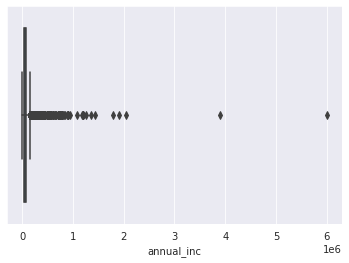

In [76]:
sns.boxplot(data=df, x='annual_inc')

In [77]:
df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])

0.50     60000.0
0.75     83000.0
0.90    116664.0
0.95    142000.0
0.97    166240.0
0.98    189996.0
0.99    235000.0
Name: annual_inc, dtype: float64

We can see 95%ile, looks like outlier

In [78]:
df = df[df.annual_inc <= df.annual_inc.quantile(0.95)]

Boxplot for dti

<AxesSubplot:xlabel='dti'>

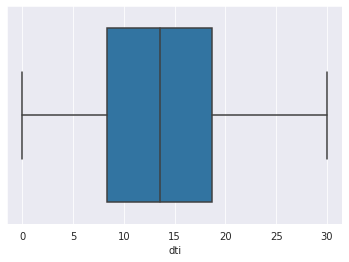

In [79]:
sns.boxplot(data=df, x="dti")

Boxplot for loan_amnt

<AxesSubplot:xlabel='loan_amnt'>

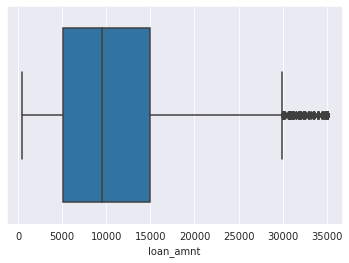

In [80]:
sns.boxplot(data=df, x="loan_amnt")

In [81]:
df.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    20000.0
0.950    25000.0
0.970    25817.5
0.975    28000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

This looks pretty continuous, so no need to remove outlier

### Univariate Analysis

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35672 entries, 0 to 39716
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            35672 non-null  int64  
 1   term                 35672 non-null  object 
 2   int_rate             35672 non-null  float64
 3   grade                35672 non-null  object 
 4   sub_grade            35672 non-null  int64  
 5   emp_length           35672 non-null  int64  
 6   home_ownership       35672 non-null  object 
 7   annual_inc           35672 non-null  float64
 8   verification_status  35672 non-null  object 
 9   loan_status          35672 non-null  object 
 10  purpose              35672 non-null  object 
 11  dti                  35672 non-null  float64
 12  issue_month          35672 non-null  int64  
 13  issue_year           35672 non-null  int64  
 14  bad_loan             35672 non-null  int64  
dtypes: float64(3), int64(6), object(6)
m

In [83]:
categorical_columns = ["term", "grade", "sub_grade", "emp_length", "home_ownership", "verification_status", "purpose", "issue_month", "issue_year"]
continuous_columns = ["loan_amnt", "int_rate", "annual_inc", "dti"]

Analyzing Categorical Column

Loan Status

<AxesSubplot:xlabel='loan_status', ylabel='count'>

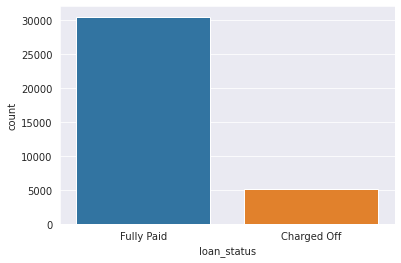

In [84]:
sns.countplot(data=df, x='loan_status')

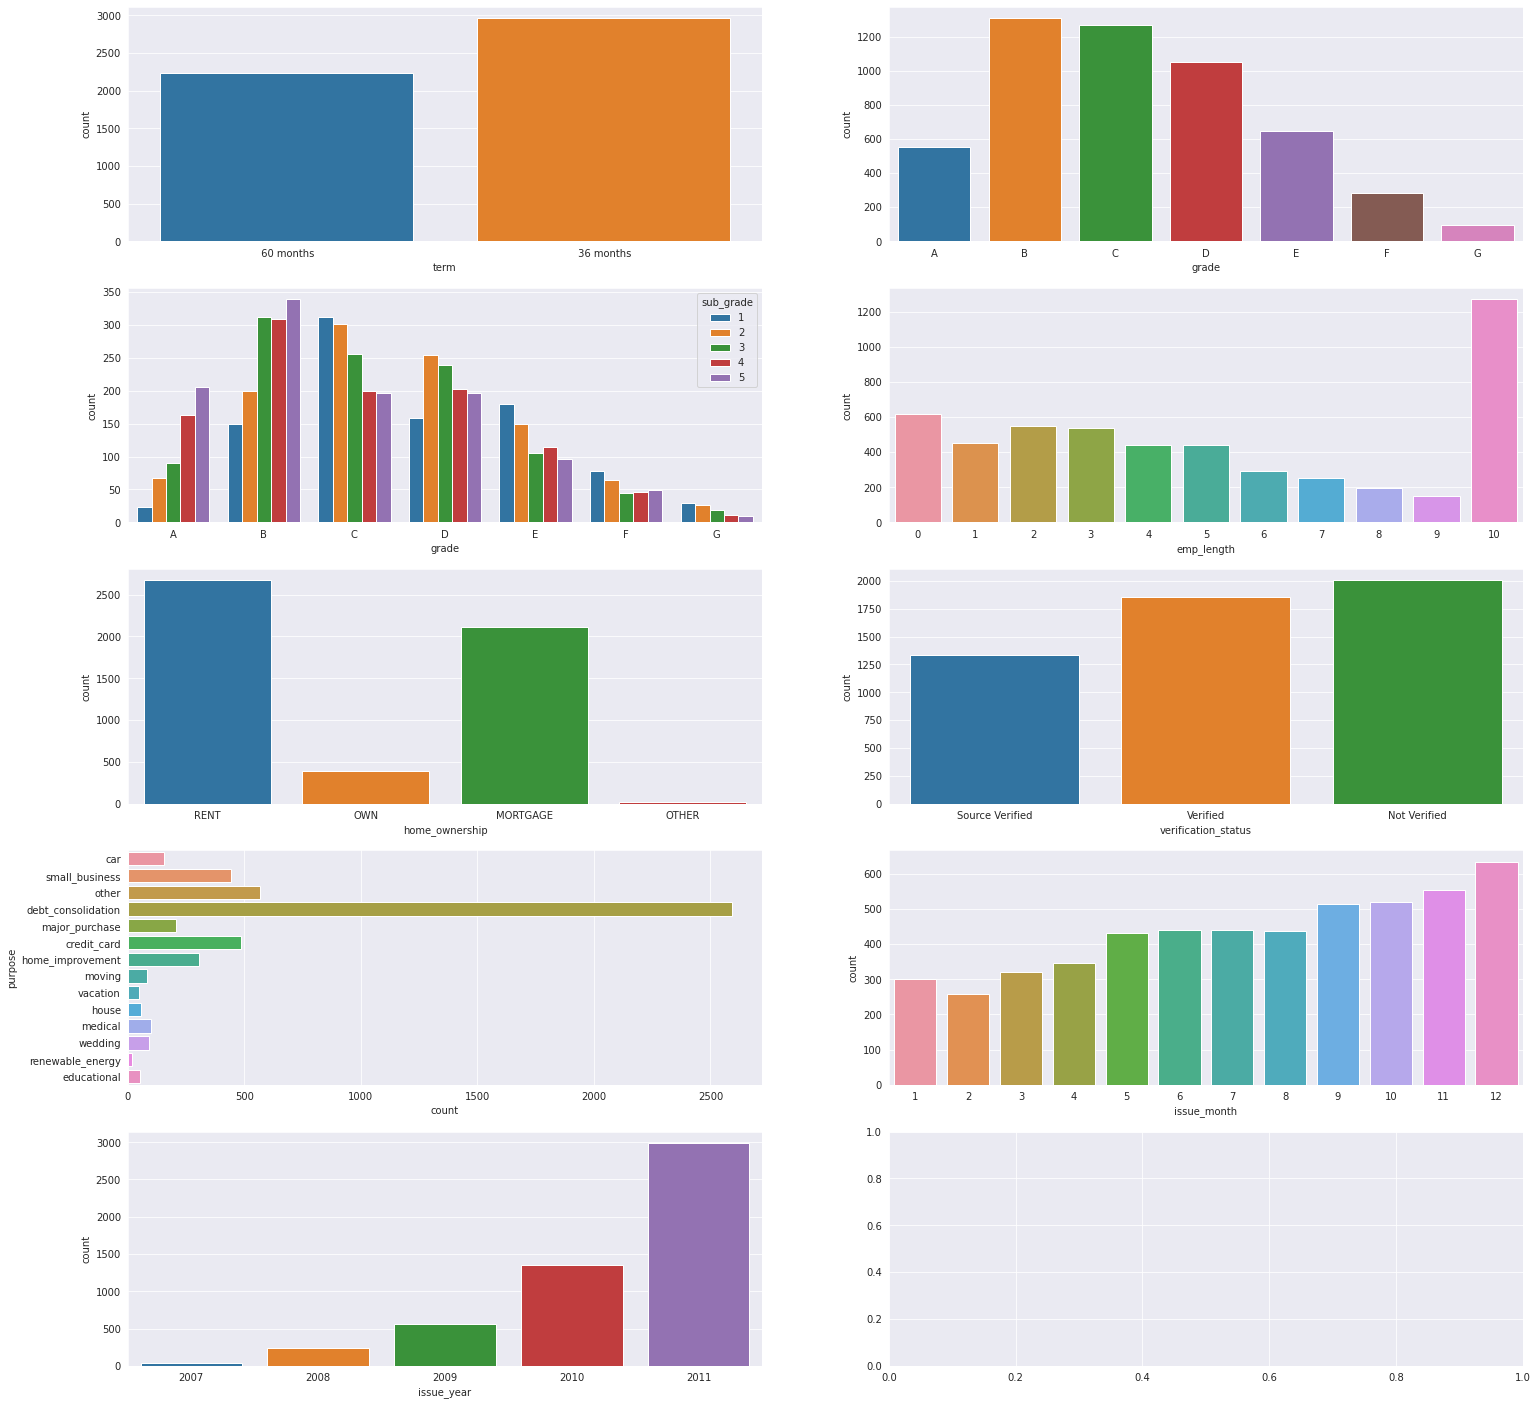

In [124]:
fig, ax =plt.subplots(5,2, figsize=(25,25))

# Multiple Graph
# Term
sns.countplot(data=df[df.bad_loan==1], x="term", ax=ax[0][0])

# Grade
sns.countplot(data=df[df.bad_loan==1], x="grade", ax=ax[0][1], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

# sub_grade
sns.countplot(data=df[df.bad_loan==1], x="grade", ax=ax[1][0], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'], hue="sub_grade")

# emp_length
sns.countplot(data=df[df.bad_loan==1], x="emp_length", ax=ax[1][1])

# home_ownership
sns.countplot(data=df[df.bad_loan==1], x="home_ownership", ax=ax[2][0])

# home_ownership
sns.countplot(data=df[df.bad_loan==1], x="verification_status", ax=ax[2][1])

# purpose
sns.countplot(data=df[df.bad_loan==1], y="purpose", ax=ax[3][0])

# issue_month
sns.countplot(data=df[df.bad_loan==1], x="issue_month", ax=ax[3][1])

# issue_year
sns.countplot(data=df[df.bad_loan==1], x="issue_year", ax=ax[4][0])

plt.show()

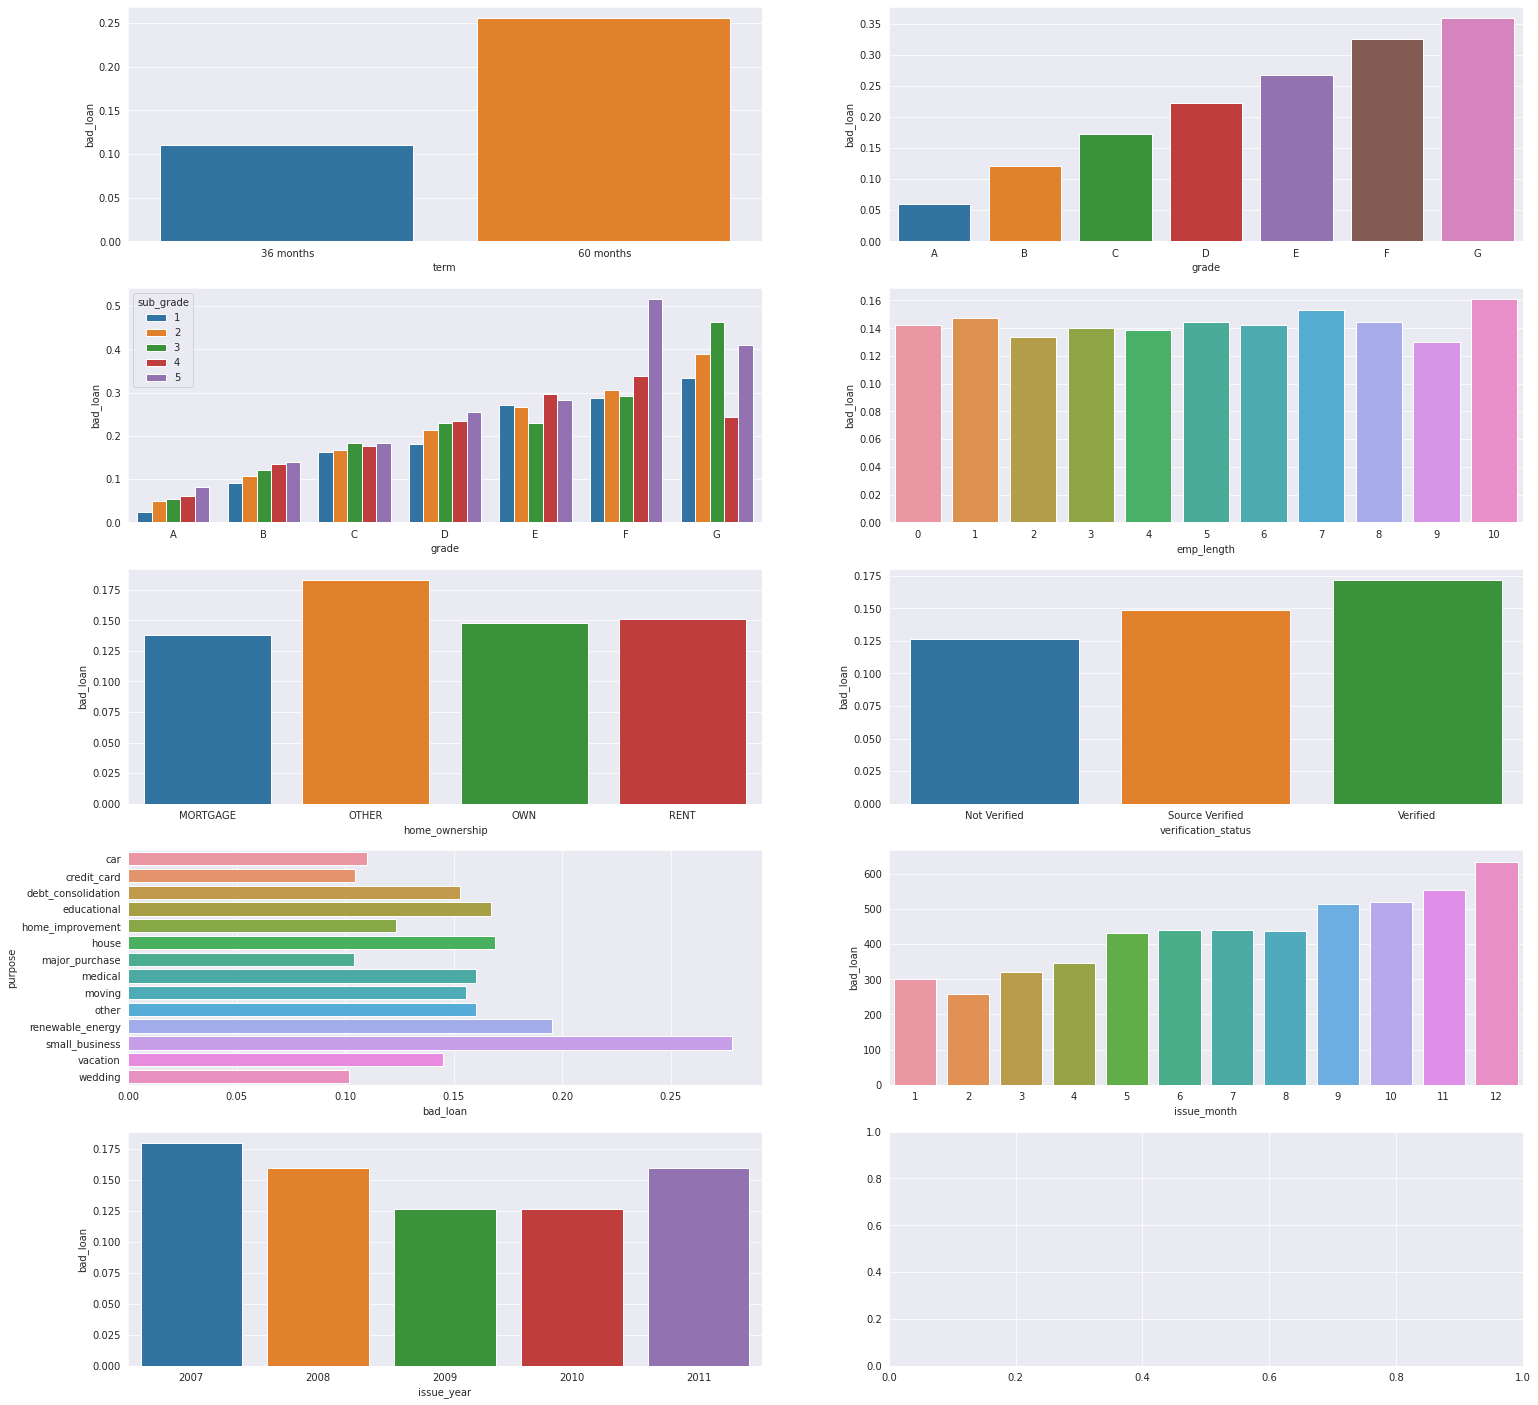

In [85]:
fig, ax =plt.subplots(5,2, figsize=(25,25))

# Multiple Graph
# Term
term_mean_data = df.groupby('term', as_index=False)['bad_loan'].mean()
sns.barplot(data=term_mean_data, x="term", y="bad_loan", ax=ax[0][0])

# Grade
grade_mean_data = df.groupby('grade', as_index=False)['bad_loan'].mean()
sns.barplot(data=grade_mean_data, x="grade", y="bad_loan", ax=ax[0][1], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

# sub_grade
sub_grade_mean_data = df.groupby(["grade", 'sub_grade'], as_index=False)['bad_loan'].mean()
sns.barplot(data=sub_grade_mean_data, x="grade", y="bad_loan", hue='sub_grade', ax=ax[1][0], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

# emp_length
emp_length_mean_data = df.groupby(['emp_length'], as_index=False)['bad_loan'].mean()
sns.barplot(data=emp_length_mean_data, x="emp_length", y="bad_loan", ax=ax[1][1])

# home_ownership
home_ownership_mean_data = df.groupby(['home_ownership'], as_index=False)['bad_loan'].mean()
sns.barplot(data=home_ownership_mean_data, x="home_ownership", y="bad_loan", ax=ax[2][0])

# home_ownership
verification_status_mean_data = df.groupby(['verification_status'], as_index=False)['bad_loan'].mean()
sns.barplot(data=verification_status_mean_data, x="verification_status", y="bad_loan", ax=ax[2][1])

# purpose
purpose_mean_data = df.groupby(['purpose'], as_index=False)['bad_loan'].mean()
sns.barplot(data=purpose_mean_data, y='purpose', x='bad_loan', ax=ax[3][0])

# issue_month
issue_month_mean_data = df.groupby(['issue_month'], as_index=False)['bad_loan'].sum()
sns.barplot(data=issue_month_mean_data, x='issue_month', y='bad_loan', ax=ax[3][1])

# issue_year
issue_year_mean_data = df.groupby(['issue_year'], as_index=False)['bad_loan'].mean()
sns.barplot(data=issue_year_mean_data, x='issue_year', y='bad_loan', ax=ax[4][0])

plt.show()

##### Observations:
- Term is 60 Months
- Bad loan increase as we go down grade where A is highest and G is lowest.
- Sub grade, for E, F and G we don't see same pattern than A ,B, C and D grades.
- Emp Length, Home Ownership and Verification Status doesn't show any clear observation for bad loan.
- For purpose, small buisness have highest probability to get defaulted.
- Issue year follows the GDP trend during Great Recession. Ref [The Great Recession Was Even Worse Than Thought](https://econproph.com/2011/07/30/the-great-recession-was-even-worse-than-thought/)

Analyzing Continuous Column

In [86]:
df['loan_amnt_bucket'] = pd.cut(df['loan_amnt'], bins=5, precision=0)
df['int_rate_bucket'] = pd.cut(df['int_rate'], bins=5, precision=0)
df['annual_inc_bucket'] = pd.cut(df['annual_inc'], bins=5, precision=0)
df['dti_bucket'] = pd.cut(df['dti'], bins=5, precision=0)


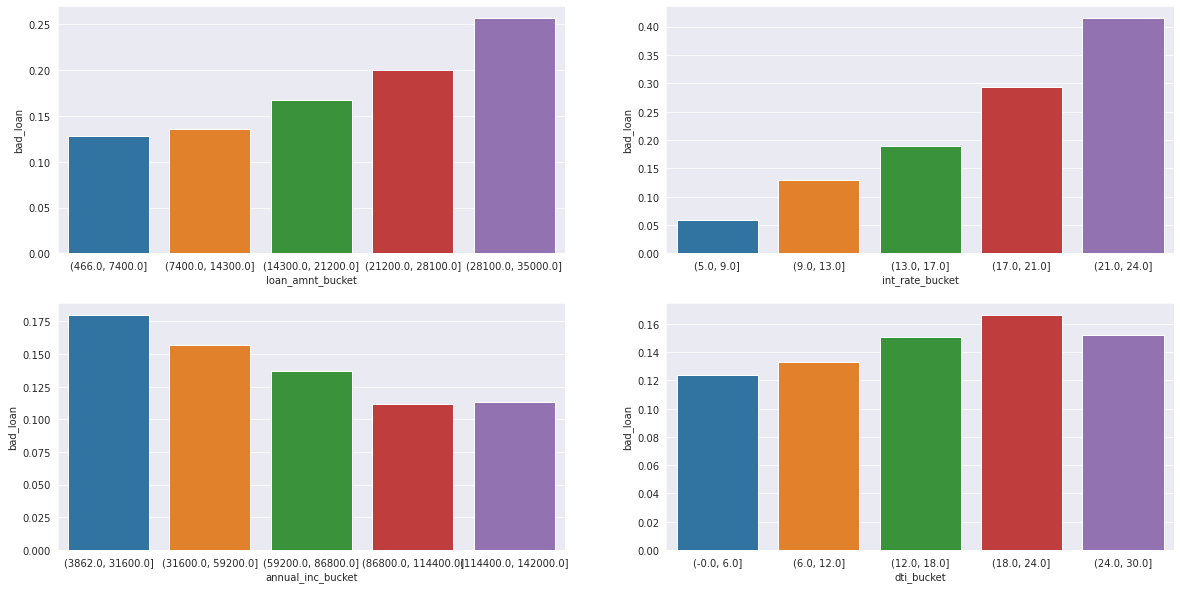

In [87]:
fig, ax =plt.subplots(2,2, figsize=(20,10))

# Multiple Graph
# loan_amnt_bucket
loan_amnt_bucket_mean_data = df.groupby('loan_amnt_bucket', as_index=False)['bad_loan'].mean()
sns.barplot(data=loan_amnt_bucket_mean_data, x="loan_amnt_bucket", y="bad_loan", ax=ax[0][0])

# int_rate_bucket
int_rate_bucket_mean_data = df.groupby('int_rate_bucket', as_index=False)['bad_loan'].mean()
sns.barplot(data=int_rate_bucket_mean_data, x="int_rate_bucket", y="bad_loan", ax=ax[0][1] )

# annual_inc_bucket
annual_inc_bucket_mean_data = df.groupby('annual_inc_bucket', as_index=False)['bad_loan'].mean()
sns.barplot(data=annual_inc_bucket_mean_data, x="annual_inc_bucket", y="bad_loan", ax=ax[1][0])

# dti_bucket
dti_bucket_mean_data = df.groupby('dti_bucket', as_index=False)['bad_loan'].mean()
sns.barplot(data=dti_bucket_mean_data, x="dti_bucket", y="bad_loan", ax=ax[1][1])

plt.show()

##### Observations:
- Loan default probability get increses as we increase loan_amnt and int_rate.
- But Loan Default probability get decrease as we increase annual income.

### Bivariate Analysis

In [88]:

all_columns = ["term", "grade", "sub_grade", "emp_length", "home_ownership", "verification_status", "purpose", "issue_month", "issue_year", "loan_amnt_bucket", "int_rate_bucket", "annual_inc_bucket", "dti_bucket"]

<AxesSubplot:xlabel='DTI Bucket', ylabel='Loan Amount'>

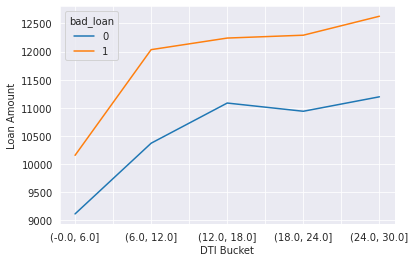

In [128]:
pd.pivot_table(data=df, index='dti_bucket', values='loan_amnt', columns='bad_loan').plot(kind='line', ylabel='Loan Amount', xlabel='DTI Bucket')

<AxesSubplot:xlabel='AnnualInc Bucket', ylabel='Loan Amount'>

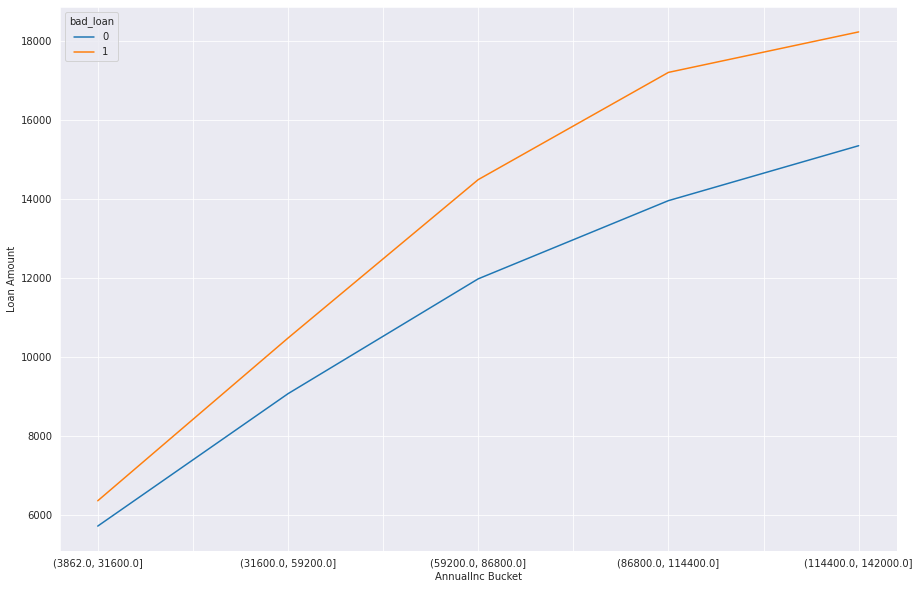

In [150]:
pd.pivot_table(data=df, index='annual_inc_bucket', values='loan_amnt', columns='bad_loan').plot(kind='line', ylabel='Loan Amount', xlabel='AnnualInc Bucket', figsize=(15,10))

<AxesSubplot:xlabel='annual_inc_bucket'>

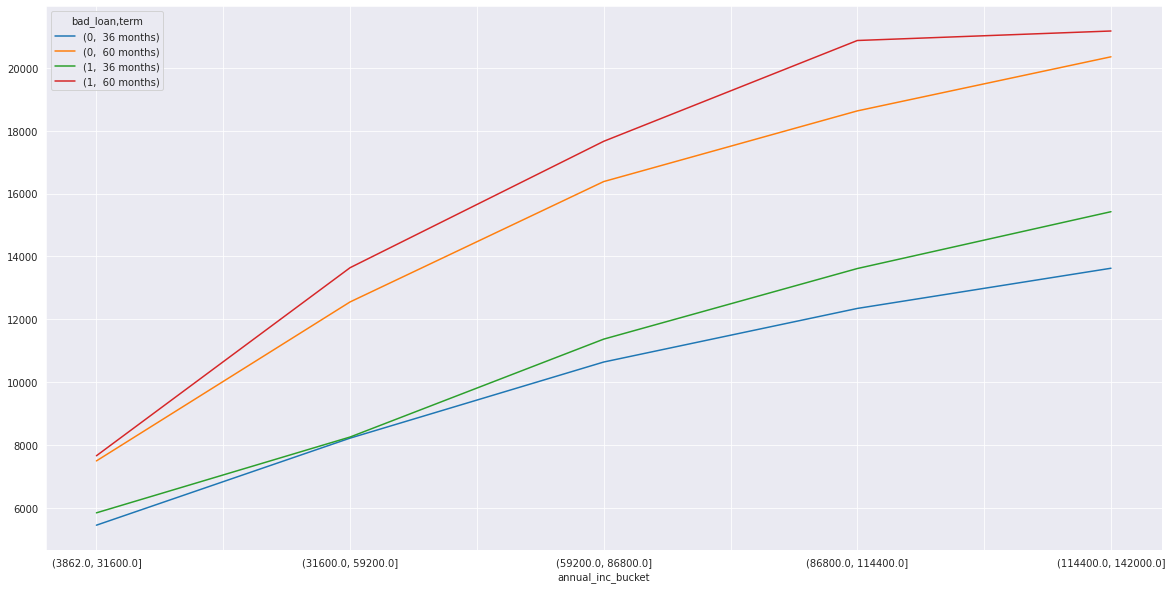

In [148]:
pd.pivot_table(data=df, index='annual_inc_bucket', values='loan_amnt', columns=['bad_loan','term']).plot(kind='line', figsize=(20,10))

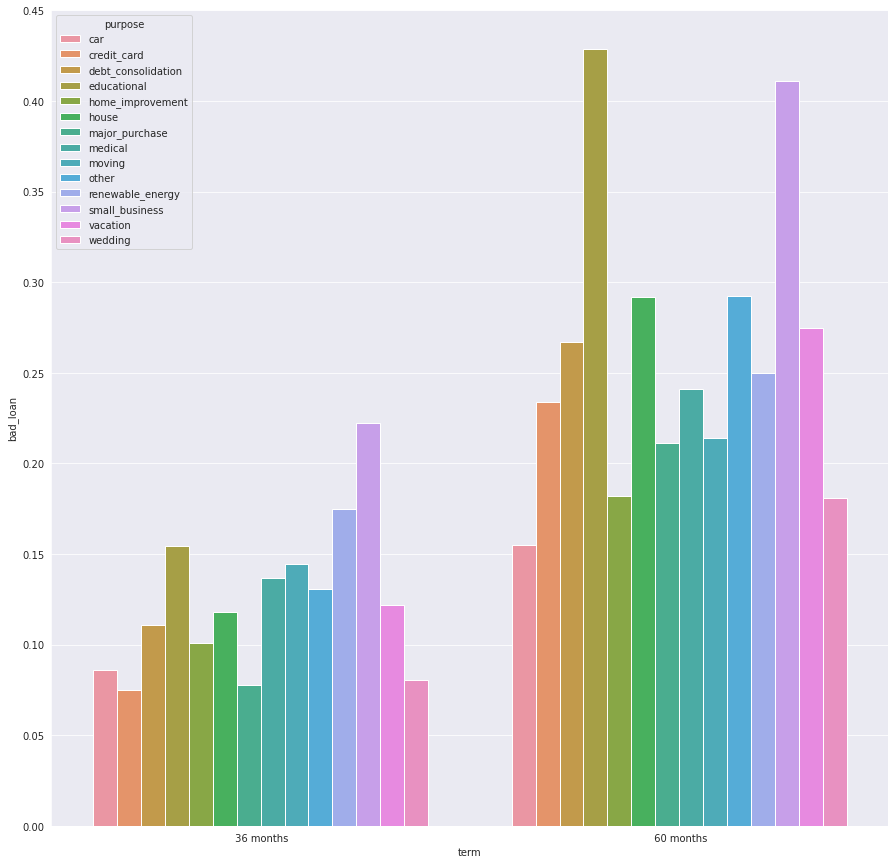

In [139]:
plt.figure(figsize=(15,15))
term_purpose = df.groupby(["term", "purpose"], as_index=False)['bad_loan'].mean()
sns.barplot(data=term_purpose, x="term", y="bad_loan", hue="purpose")
plt.show()

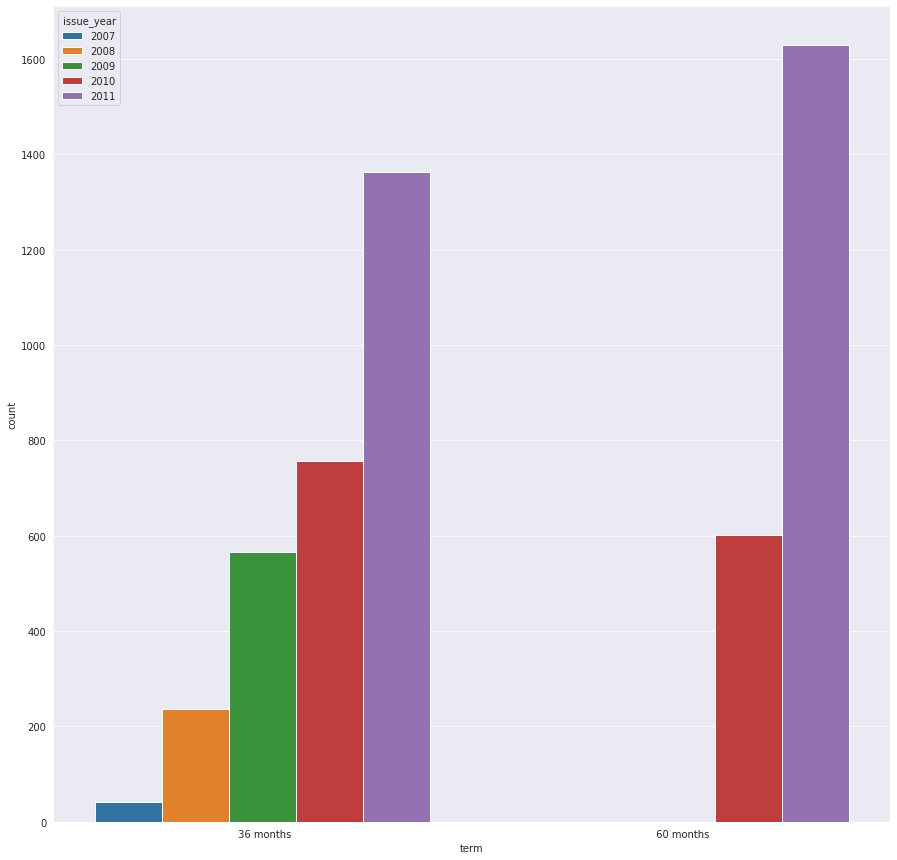

In [138]:
plt.figure(figsize=(15,15))
sns.countplot(data=df[df.bad_loan==1], x="term", hue="issue_year", order=[" 36 months", " 60 months"])
plt.show()

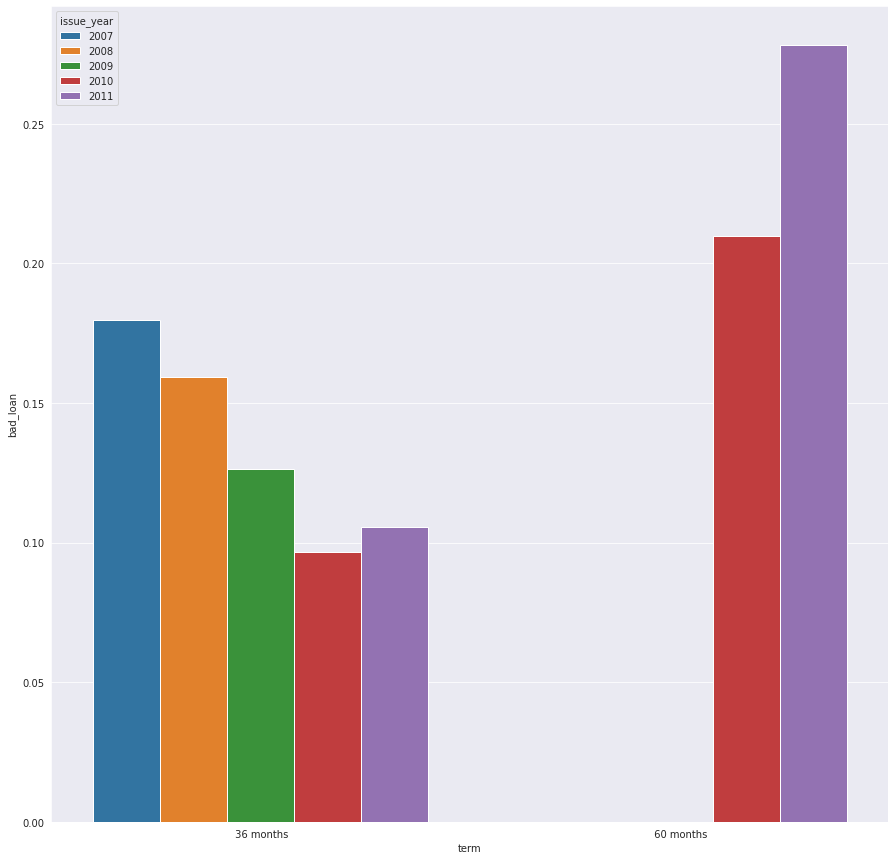

In [136]:
plt.figure(figsize=(15,15))
term_issue_year = df.groupby(["term", "issue_year"], as_index=False)['bad_loan'].mean()
sns.barplot(data=term_issue_year, x="term", y="bad_loan", hue="issue_year")
plt.show()

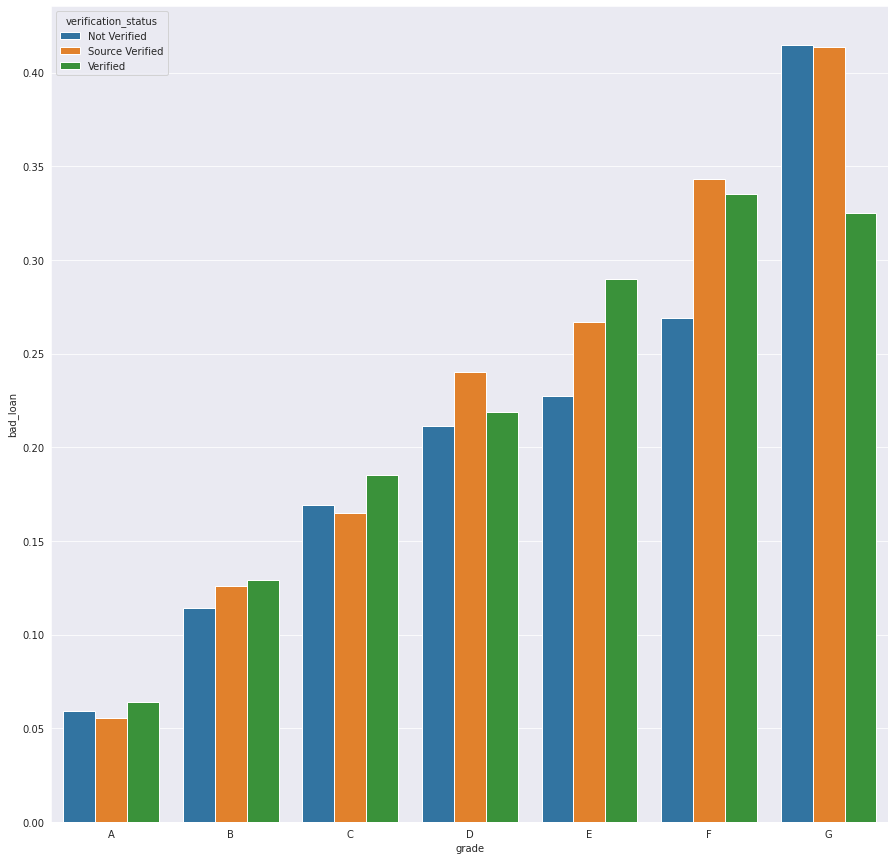

In [144]:
plt.figure(figsize=(15,15))
sns.barplot(data=df.groupby(["grade", "verification_status"], as_index=False)['bad_loan'].mean(), x="grade", y="bad_loan", hue="verification_status")
plt.show()

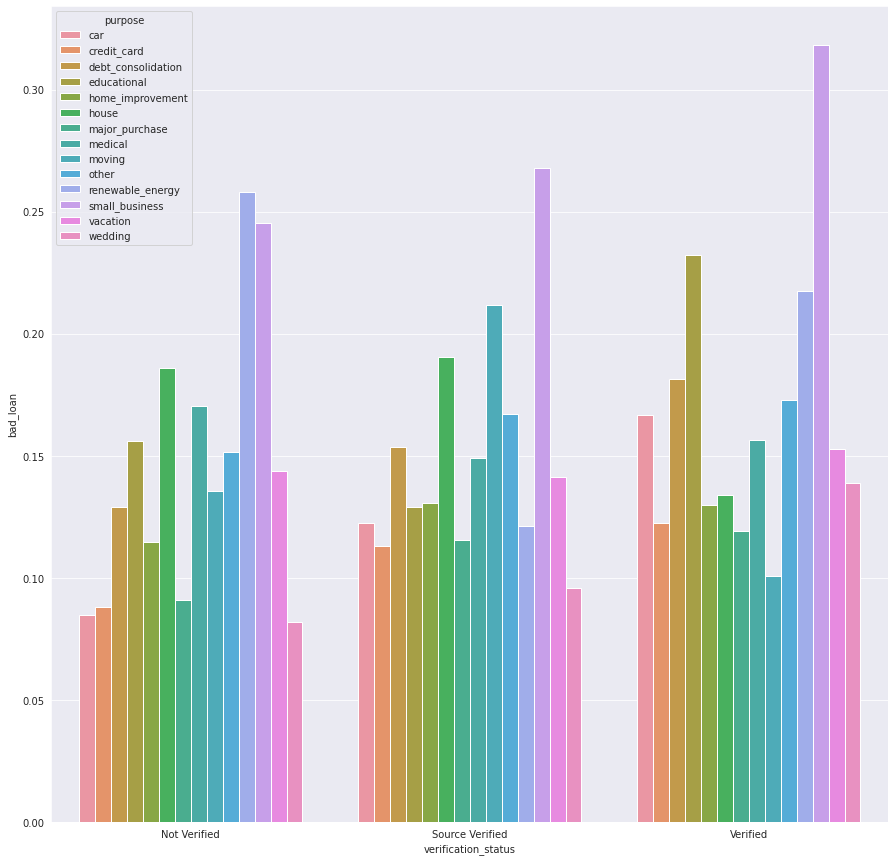

In [145]:
plt.figure(figsize=(15,15))
sns.barplot(data=df.groupby(["purpose", "verification_status"], as_index=False)['bad_loan'].mean(), x="verification_status", y="bad_loan", hue="purpose")
plt.show()

<AxesSubplot:>

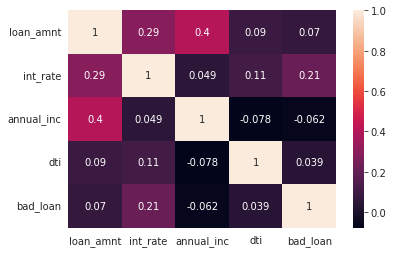

In [90]:
temp = continuous_columns + ["bad_loan"]
sns.heatmap(df[temp].corr(), annot=True)

### Recommendations
We can detect bad loans,
- Higher amount of loan were given to people, with less DTI.
- Similarly, Higher amount of loan given to people with lower annual income bracket.
- Grade G, is the grade with highest interest rate but we can see that it has been loaned to
people who are not verified, where around 42% loan gets charged off.
- Don’t provide loan for small_buisness unless they get verified. There is 42% probability that
loan get charged off if it is provided for small business without verification
- Highest bracket of interest Rate were given to “Not Verified” borrower, which can be
prevented from charged off.